# Working with Data Scientist
One of the challenges today is bridging the gap between data scientists and software engineering. In this example, we take a model and export it so that it can be used in a microservice.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications import xception

### load a pre-trained Xception model
This is a fully connected CNN with multiple layers. While we're using a pre=generated model here, it represents what I data scientist might need to have exposed to the edge. (Note: use model.summary() to view the layers)

In [2]:
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### load a test image

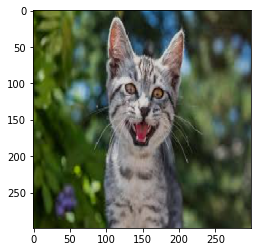

In [8]:
IMAGE_PATH='../images/cat.jpg' 
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/299.)
#print(img)

### Classify the Image

In [9]:
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
xception.decode_predictions(predictions,top=1)


[[('n02124075', 'Egyptian_cat', 0.9437337)]]

### Export Model
We'll export the model, so that way we can bring it into another language and create a microservice from it.

In [10]:
model.save("xception.h5")

### View the Bag of Words
https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a